In [ ]:
%pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [5]:
import gdown
import pandas as pd

# Google Drive 檔案 ID
file_id = "1AUK7p08H55U2A3sKBUFwP1s8QPSEFujJ"
url = f"https://drive.google.com/uc?id={file_id}"

# 下載 CSV 檔
gdown.download(url, "house_price.csv", quiet=False)

# 讀取 CSV
df = pd.read_csv("house_price.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1AUK7p08H55U2A3sKBUFwP1s8QPSEFujJ
To: C:\Users\anna0\anaconda_projects\db\期末\house_price.csv
100%|██████████| 461k/461k [00:00<00:00, 13.2MB/s]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
print(df.shape)
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False)

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [19]:
# 資料清理
threshold = len(df) * 0.8
df = df.dropna(thresh=threshold)
for col in df.select_dtypes(include=['number']).columns:
  df[col] = df[col].fillna(df[col].median())

In [21]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [27]:
# 資料標註(one hot-encoding)
onehot_cols = [
    'MSSubClass', 'MSZoning', 'Street', 'LotConfig',
    'Neighborhood', 'Condition1', 'Condition2', 'CentralAir'
]

df_onehot = pd.get_dummies(df[onehot_cols], drop_first=True)

In [29]:
# 資料標註(Target encoding)
target_cols = [
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'Heating', 'SaleType', 'SaleCondition'
]

for col in target_cols:
    means = df.groupby(col)['SalePrice'].mean()
    df[col + '_te'] = df[col].map(means)

In [35]:
# 資料標註(Ordinal Mapping)
ordinal_mappings = {
    'ExterQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'ExterCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'HeatingQC': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'KitchenQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'FireplaceQu': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtExposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'Functional': {'None': 0, 'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
    'GarageFinish': {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
    'PavedDrive': {'N': 0, 'P': 1, 'Y': 2},
    'LotShape': {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4},
    'LandContour': {'Low': 1, 'HLS': 2, 'Bnk': 3, 'Lvl': 4},
    'LotConfig': {'FR3': 1, 'FR2': 2, 'Corner': 3, 'CulDSac': 4, 'Inside': 5},
    'LandSlope': {'Sev': 1, 'Mod': 2, 'Gtl': 3},
    'BldgType': {'2fmCon': 1, 'TwnhsE': 2, 'Twnhs': 3, 'Duplex': 4, '1Fam': 5},
    'HouseStyle': {'1.5Unf': 1, '1.5Fin': 2, 'SFoyer': 3, 'SLvl': 4, '2.5Unf': 5, '2.5Fin': 6, '1Story': 7, '2Story': 8},
    'Foundation': {'Slab': 1, 'BrkTil': 2, 'CBlock': 3, 'Stone': 4, 'Wood': 5, 'PConc': 6},
    'Electrical': {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
    'GarageType': {'None': 0, 'CarPort': 1, 'Detchd': 2, 'Basment': 3, '2Types': 4, 'Attchd': 5}
}

# 將缺失值先補上 'None'
df.fillna('None', inplace=True)

# 複製資料備份並執行 ordinal mapping
df_ordinal_mapped = df.copy()
for col, mapping in ordinal_mappings.items():
    if col in df_ordinal_mapped.columns:
        df_ordinal_mapped[col] = df_ordinal_mapped[col].map(mapping)

int64
0


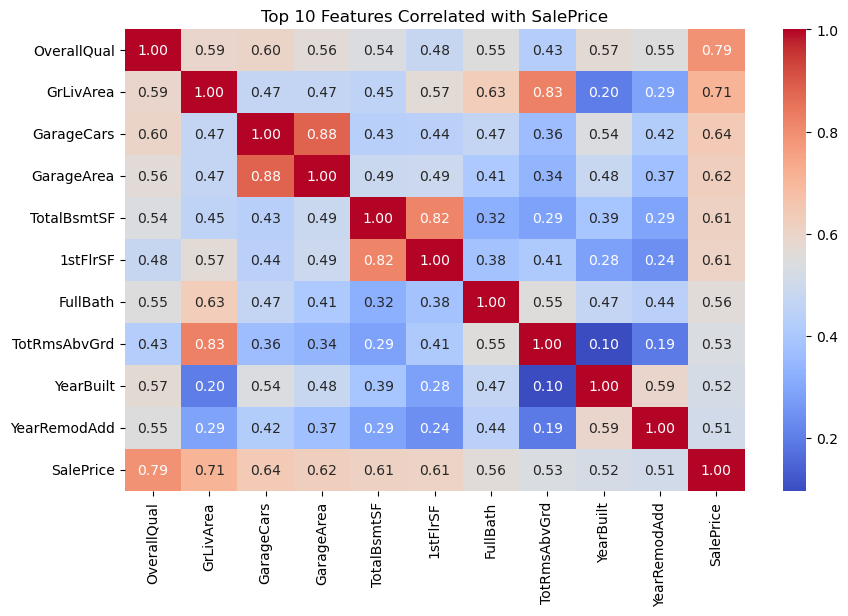

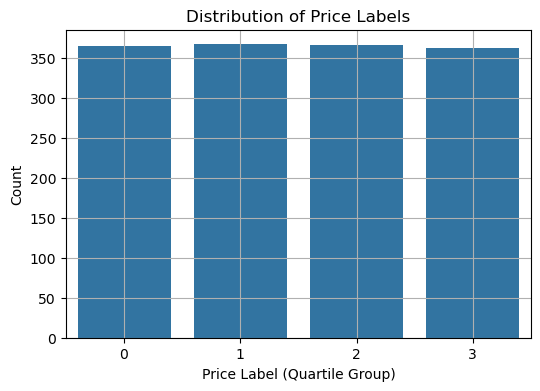

{0: 365, 1: 367, 2: 366, 3: 362}

In [45]:
# EDA
import numpy as np

# 檢查統計值
print(df['SalePrice'].dtype)
print(df['SalePrice'].isnull().sum())

# 計算數值欄位與 SalePrice 的皮爾森相關係數
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

# 選出與 SalePrice 最相關的前 10 個變數（絕對值排序）
top_corr = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)[1:11]

# 畫出熱力圖
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df[top_corr.index.tolist() + ['SalePrice']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Top 10 Features Correlated with SalePrice")
plt.show()

# 建立分類標籤（分成 4 等份）
df['Price_Label'] = pd.qcut(df['SalePrice'], q=4, labels=False, duplicates='drop')

# 計算每個分類的樣本數
price_label_counts = df['Price_Label'].value_counts().sort_index()

# 畫出分類比例圖
plt.figure(figsize=(6, 4))
sns.countplot(x='Price_Label', data=df)
plt.title("Distribution of Price Labels")
plt.xlabel("Price Label (Quartile Group)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# 傳回價格分類統計
price_label_counts.to_dict()

 GaussianNB Accuracy: 0.5788

Confusion Matrix:
[[67  5  0  1]
 [60 10  4  0]
 [21  3 39 10]
 [ 1  2 16 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.92      0.60        73
           1       0.50      0.14      0.21        74
           2       0.66      0.53      0.59        73
           3       0.83      0.74      0.78        72

    accuracy                           0.58       292
   macro avg       0.61      0.58      0.55       292
weighted avg       0.61      0.58      0.54       292



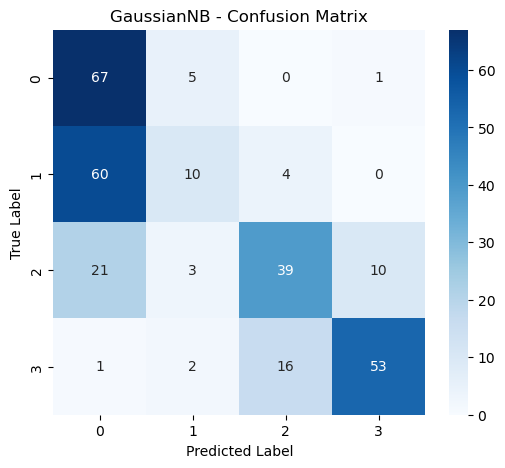

In [84]:
# GaussianNB

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取資料
df = pd.read_csv("house_price.csv")

# 建立分類標籤（以房價 SalePrice 分成 4 分位數）
df['Price_Label'] = pd.qcut(df['SalePrice'], q=4, labels=False)

# 選擇數值特徵
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Id', 'SalePrice', 'Price_Label'])
y = df['Price_Label']

# 補缺失值（以中位數填補）
X.fillna(X.median(numeric_only=True), inplace=True)

# 資料切分
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 建立與訓練 GaussianNB 模型
model = GaussianNB()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 衡量指標
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 輸出結果
print(f" GaussianNB Accuracy: {acc:.4f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# 視覺化混淆矩陣
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("GaussianNB - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


KNeighborsClassifier Accuracy: 0.5993

Confusion Matrix:
[[45 21  5  2]
 [14 40 18  2]
 [ 5 19 37 12]
 [ 0  5 14 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        73
           1       0.47      0.54      0.50        74
           2       0.50      0.51      0.50        73
           3       0.77      0.74      0.75        72

    accuracy                           0.60       292
   macro avg       0.61      0.60      0.60       292
weighted avg       0.61      0.60      0.60       292



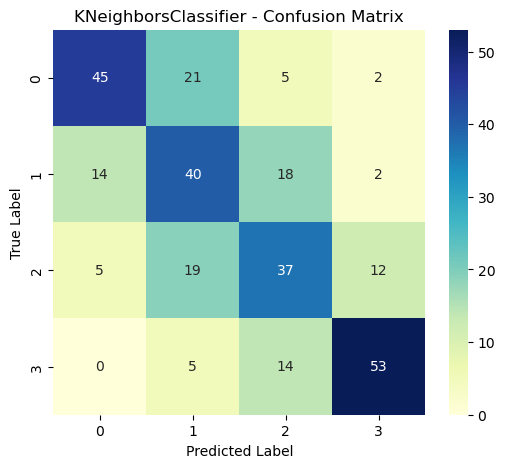

In [73]:
# KNeighborClassifier 

from sklearn.neighbors import KNeighborsClassifier

# 建立與訓練 KNN 模型（預設 k=5）
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 衡量指標
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 輸出結果
print(f"KNeighborsClassifier Accuracy: {acc:.4f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# 混淆矩陣圖
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("KNeighborsClassifier - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

LogisticRegression Accuracy: 0.7568

Confusion Matrix:
[[56 16  0  1]
 [ 9 51 14  0]
 [ 0 13 51  9]
 [ 0  1  8 63]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        73
           1       0.63      0.69      0.66        74
           2       0.70      0.70      0.70        73
           3       0.86      0.88      0.87        72

    accuracy                           0.76       292
   macro avg       0.76      0.76      0.76       292
weighted avg       0.76      0.76      0.76       292



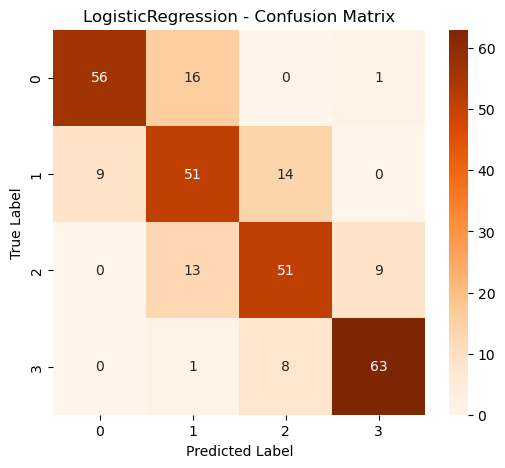

In [86]:
# LogisticRegression 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 建立 Logistic Regression 模型並標準化特徵
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 指標評估
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 輸出結果
print(f"LogisticRegression Accuracy: {acc:.4f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# 混淆矩陣視覺化
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("LogisticRegression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

DecisionTreeClassifier Accuracy: 0.6644

Confusion Matrix:
[[54 17  2  0]
 [12 44 16  2]
 [ 2 19 37 15]
 [ 2  2  9 59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        73
           1       0.54      0.59      0.56        74
           2       0.58      0.51      0.54        73
           3       0.78      0.82      0.80        72

    accuracy                           0.66       292
   macro avg       0.67      0.67      0.66       292
weighted avg       0.66      0.66      0.66       292



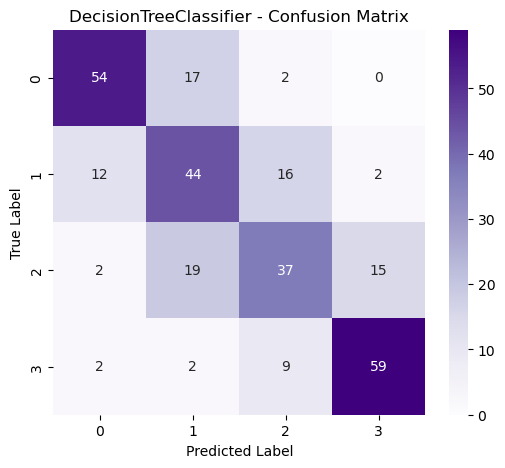

In [77]:
# DecisionTreeClassifier 

from sklearn.tree import DecisionTreeClassifier

# 建立模型
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估指標
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 顯示結果
print(f"DecisionTreeClassifier Accuracy: {acc:.4f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# 繪製混淆矩陣
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("DecisionTreeClassifier - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

RandomForestClassifier Accuracy: 0.7568

Confusion Matrix:
[[59 13  0  1]
 [13 54  6  1]
 [ 0 14 47 12]
 [ 0  1 10 61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        73
           1       0.66      0.73      0.69        74
           2       0.75      0.64      0.69        73
           3       0.81      0.85      0.83        72

    accuracy                           0.76       292
   macro avg       0.76      0.76      0.76       292
weighted avg       0.76      0.76      0.76       292



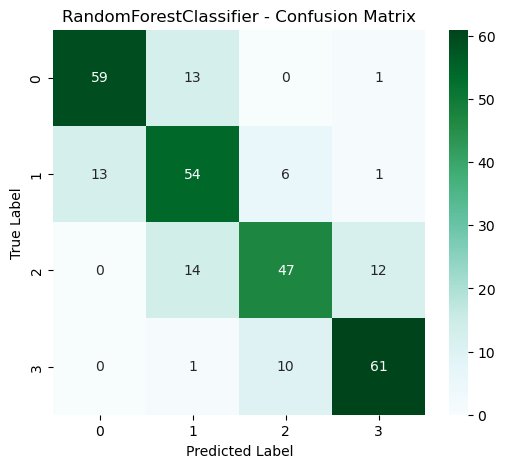

In [67]:
# RandomForestClassifier 

from sklearn.ensemble import RandomForestClassifier

# 建立與訓練模型
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 輸出結果
print(f"RandomForestClassifier Accuracy: {acc:.4f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# 混淆矩陣圖示
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuGn")
plt.title("RandomForestClassifier - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

ExtraTreeClassifier Accuracy: 0.5719

Confusion Matrix:
[[52 18  2  1]
 [20 35 18  1]
 [ 3 18 36 16]
 [ 1  9 18 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.70        73
           1       0.44      0.47      0.45        74
           2       0.49      0.49      0.49        73
           3       0.71      0.61      0.66        72

    accuracy                           0.57       292
   macro avg       0.58      0.57      0.57       292
weighted avg       0.58      0.57      0.57       292



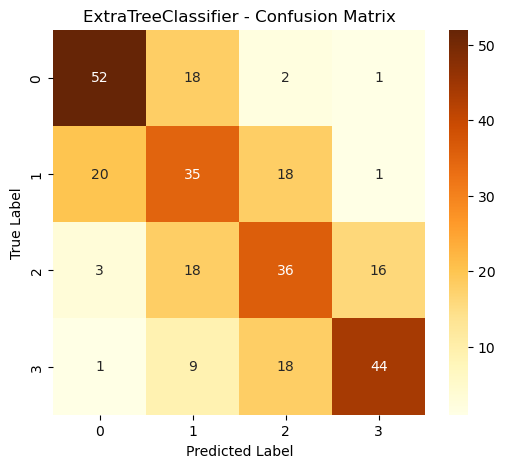

In [71]:
# ExtraTreeClassifier 
# 建立模型

from sklearn.tree import ExtraTreeClassifier

model = ExtraTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估指標
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 輸出結果
print(f"ExtraTreeClassifier Accuracy: {acc:.4f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# 混淆矩陣圖
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr")
plt.title("ExtraTreeClassifier - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\Users\anna0\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier Accuracy: 0.7466

Confusion Matrix:
[[60 11  1  1]
 [ 6 56 11  1]
 [ 0 18 44 11]
 [ 0  5  9 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        73
           1       0.62      0.76      0.68        74
           2       0.68      0.60      0.64        73
           3       0.82      0.81      0.81        72

    accuracy                           0.75       292
   macro avg       0.76      0.75      0.75       292
weighted avg       0.76      0.75      0.75       292



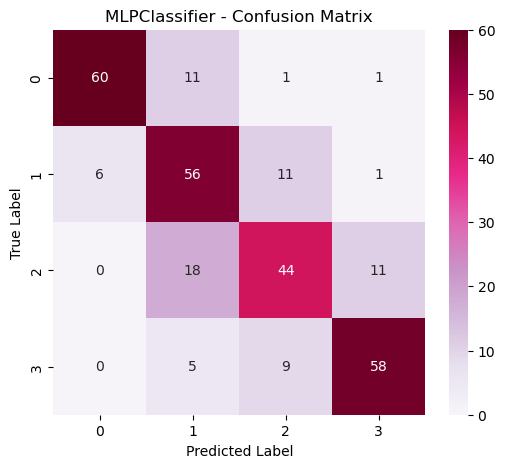

In [80]:
# MLPClassifier

from sklearn.neural_network import MLPClassifier

# 建立 MLP 模型（加上標準化處理）
model = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
)

# 訓練
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估結果
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 輸出結果
print(f"MLPClassifier Accuracy: {acc:.4f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# 混淆矩陣圖
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")
plt.title("MLPClassifier - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

StackingClassifier Accuracy: 0.7671

Confusion Matrix:
[[58 14  0  1]
 [10 55  9  0]
 [ 0 11 50 12]
 [ 0  1 10 61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        73
           1       0.68      0.74      0.71        74
           2       0.72      0.68      0.70        73
           3       0.82      0.85      0.84        72

    accuracy                           0.77       292
   macro avg       0.77      0.77      0.77       292
weighted avg       0.77      0.77      0.77       292



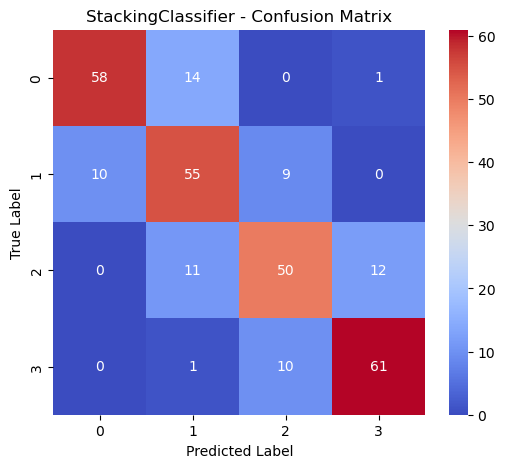

In [82]:
# StackingClassifier

from sklearn.ensemble import StackingClassifier

# 建立基礎模型（也可使用管線包裝）
base_models = [
    ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# 最終模型使用 Logistic Regression
final_estimator = LogisticRegression(max_iter=1000)

# 建立 StackingClassifier
model = StackingClassifier(estimators=base_models, final_estimator=final_estimator, passthrough=False)

# 訓練模型
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估結果
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 輸出結果
print(f"StackingClassifier Accuracy: {acc:.4f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# 畫出混淆矩陣
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.title("StackingClassifier - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()